 <img src="https://eant.tech/imagenes/logo.png" width=25% height=80%  >

## <img src="http://icons.iconarchive.com/icons/cornmanthe3rd/plex/256/Other-python-icon.png" width="40"> Ejercicio API De Mecardo libre

En este ejercicio vamos a realizar el analisis basado en la busqueda de un electrodomestico.
Para el desarrollo vamos a utilizar la API publica de **Mercado Libre**, la misma no requiere de autenticación y retorna un numero limitado de busquedas.
Para más información puede ingresar al siguiente sitio: https://developers.mercadolibre.com.ar/

<br>
<center>

<img src="https://i.ibb.co/qBFZkj9/descarga.png" alt="descarga" border="0">

</center>

🏷️ 1. Importamos los paquetes que vamos a utilizar

In [ ]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt


🏷️ 2. Vamos a realizar una busqueda de una heladera, por lo cual generar uns variable denominada `search`.

In [ ]:
search='heladera'

🏷️ 3. La siguiente es la url que contiene:
* "q"= que es la query que se va realizar
* "limit" que es la cantidad de resultados que se pueden retornar.
* "formato"

In [ ]:
url=f"""https://api.mercadolibre.com/sites/MLA/search?q={search}&limit=50#json"""

🏷️ 4.Realizamos el llamado a la api con el metodo get

In [ ]:
response=requests.get(url)

🏷️ 5. Validamos el estado que nos retorna

In [ ]:
response.status_code

200

🏷️ 6. Cuantas y cuales son las keys retorna el json

In [ ]:
len(response.json())

9

In [ ]:
data=response.json()
data.keys()

dict_keys(['site_id', 'country_default_time_zone', 'query', 'paging', 'results', 'sort', 'available_sorts', 'filters', 'available_filters'])

🏷️ 7. Imprimir los valores que contiene las keys site_id,country_default_time_zone y query

In [ ]:
for i in ['site_id', 'country_default_time_zone', 'query']:
  print(i,':',data[i])

site_id : MLA
country_default_time_zone : GMT-03:00
query : heladera


🏷️ 8. Cuantos resultados puede retornar la busqueda?

In [ ]:
# 50 son los solicitados, pero hay un total de 10290
data['paging']

{'limit': 50, 'offset': 0, 'primary_results': 1000, 'total': 10290}

🏷️ 9. Cual es el tipo de ordenamiento que retorna esta busqueda y cuales son los tipos de de ordenamientos que se podrian utilizar.

In [ ]:
data['sort']

{'id': 'relevance', 'name': 'Más relevantes'}

In [ ]:
data['available_sorts']

[{'id': 'price_asc', 'name': 'Menor precio'},
 {'id': 'price_desc', 'name': 'Mayor precio'}]

🏷️ 10. Generar un dataframe en base a las catrogrias y subcategorias de los porducto.

In [ ]:
data['filters']

[{'id': 'category',
  'name': 'Categorías',
  'type': 'text',
  'values': [{'id': 'MLA398582',
    'name': 'Heladeras',
    'path_from_root': [{'id': 'MLA5726',
      'name': 'Electrodomésticos y Aires Ac.'},
     {'id': 'MLA1576', 'name': 'Refrigeración'},
     {'id': 'MLA398582', 'name': 'Heladeras'}]}]}]

In [ ]:
# Debo ir ingresando a cada nodo colocando el indice 0
cat_principal=pd.json_normalize(data['filters'][0]['values'][0])
cat_principal

,id,name,path_from_root
0,MLA398582,Heladeras,"[{'id': 'MLA5726', 'name': 'Electrodomésticos ..."


In [ ]:
cat_path=pd.json_normalize(data['filters'][0]['values'][0]['path_from_root'])
cat_path

,id,name
0,MLA5726,Electrodomésticos y Aires Ac.
1,MLA1576,Refrigeración
2,MLA398582,Heladeras


🏷️ 11. Cuantos son los posibles filtros que se pueden consultar?

In [ ]:
len(data['available_filters'])

29

🏷️ 12. Imprimir los posibles filtros?

In [ ]:
[i['name'] for i in data['available_filters']]

🏷️ 13. Cuales y cuantas son las tiendas oficiales disponibles, generar un dataframe para su resolución

In [ ]:
data['available_filters'][0]

{'id': 'official_store',
 'name': 'Tiendas oficiales',
 'type': 'text',
 'values': [{'id': 'all',
   'name': 'Todas las tiendas oficiales',
   'results': 658},
  {'id': '229', 'name': 'Fravega', 'results': 94},
  {'id': '524', 'name': 'Patrick', 'results': 32},
  {'id': '857', 'name': 'Electrolux', 'results': 4},
  {'id': '1372', 'name': 'Mall 360', 'results': 12},
  {'id': '81', 'name': 'Whirlpool', 'results': 29},
  {'id': '82', 'name': 'Megatone', 'results': 58},
  {'id': '47', 'name': 'Casa del audio', 'results': 25},
  {'id': '1191', 'name': 'Philco', 'results': 7},
  {'id': '455', 'name': 'Peabody', 'results': 7},
  {'id': '1278', 'name': 'Siam', 'results': 4},
  {'id': '1510', 'name': 'Gafa', 'results': 4},
  {'id': '695', 'name': 'GE Appliances', 'results': 4}]}

In [ ]:
tiendas_oficiales=pd.DataFrame(data['available_filters'][0]['values'])
tiendas_oficiales=tiendas_oficiales.loc[tiendas_oficiales.id!='all',:]
tiendas_oficiales.head()

,id,name,results
1,229,Fravega,94
2,524,Patrick,32
3,857,Electrolux,4
4,1372,Mall 360,12
5,81,Whirlpool,29


In [ ]:
print('La cantidad de tienas oficiales que hay :',tiendas_oficiales.shape[0])
print('Las tiends oficiales son:',list(tiendas_oficiales.name))

La cantidad de tienas oficiales que hay : 12
Las tiends oficiales son: ['Fravega', 'Patrick', 'Electrolux', 'Mall 360', 'Whirlpool', 'Megatone', 'Casa del audio', 'Philco', 'Peabody', 'Siam', 'Gafa', 'GE Appliances']


🏷️ 14. Generar multiples dataframes con los nombres de cada filtro posible, concatenar "FILTER_" a la denominación del dataframe

In [ ]:
# Generar multiples dataframes con los nombres de cada filtro posible, concatenar "FILTER_" a la denominación del dataframe
for c in data['available_filters']:
     exec('{} = pd.json_normalize({})'.format('FILTER_'+c['id'],c['values']))

In [ ]:
# ver listados de objetos
%who_ls 

In [ ]:
# Print solamente los dataframes
%who_ls DataFrame

🏷️ 15. Cuantas marcas posibles encuentra para el producto buscado

In [ ]:
print('La cantidad de marcas disponibles es',FILTER_BRAND.shape[0])

La cantidad de marcas disponibles es 59


🏷️ 16. Generar un dataframe con todos los productos de la busqueda

In [ ]:
# Generar un dataframe con todos los productos de la busqueda
df_results=pd.json_normalize(data['results'])

🏷️ 17. Cuantos productos y cuantas variables se retornaron

In [ ]:
df_results.shape

(50, 107)

🏷️ 18. Compare los precios entre tiendas oficiales y el resto de los vendedores para los productos nuevos

In [ ]:
df_results['official_store']=df_results['official_store_id'].isna().astype(str)

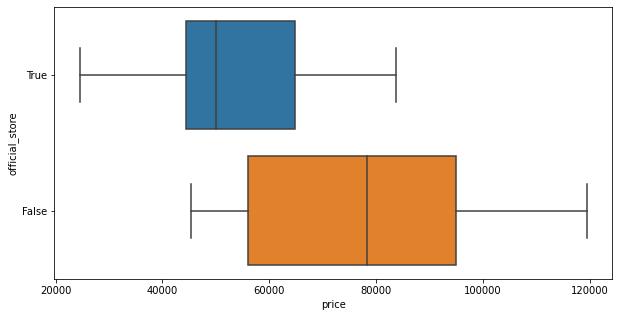

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="price", y="official_store", data=df_results.loc[df_results.condition=='new',:],showfliers=False)
plt.show()

🏷️ 19. Cual es el producto que contiene las siguientes caracteristicas:
1. Reputacion del venderor de 5 estrellas.
2. Producto Nuevo
3. Contiene la marca Saumsung
5. Que la logitica es proporcionada por Mercado Libre ("mel")
6. Que la dirección del venderor este en Buenos Aires incluyendo Capital Federal.
7. El precio este entre q25 y q50 en base a los datos obtenidos de los filtros anteriores.

Posteriormente retorne el producto que tenga el menor precio.

In [ ]:
# 1.Reputacion del venderor de 5 estrellas: seller.seller_reputation.level_id	=='5_green'
# 2.Producto Nuevo: condition	=='new'
# 3.Contiene la marca Saumsung: title.str.find('title')>=0
# 4.Que la dirección del venderor este en Buenos Aires incluyendo Capital Federal: seller_address.state.id.isin(['AR-B','AR-C'])
# 5.El precio este entre q25 y q50 en base a los datos obtenidos de los filtros anteriores, pero dentro de este rango sea el mas economico : price.between(price.quantile(0.25),price.quantile(0.5))

df_heladera=df_results.loc[
               (df_results['seller.seller_reputation.level_id'] =='5_green') &
               (df_results['condition']=='new') &
               (df_results['title'].str.find('Samsung')>=0) &
               (df_results['seller_address.state.id'].isin(['AR-B','AR-C'])),: ]

df_heladera.loc[
               (df_heladera['price'].between(df_heladera['price'].quantile(0.25),
                                             df_heladera['price'].quantile(0.5)))
               ,:
].sort_values('price').head(1)

,id,site_id,title,price,sale_price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,stop_time,condition,permalink,thumbnail,thumbnail_id,accepts_mercadopago,attributes,original_price,category_id,official_store_id,domain_id,catalog_product_id,tags,catalog_listing,use_thumbnail_id,offer_score,offer_share,match_score,order_backend,seller.id,seller.permalink,seller.registration_date,seller.car_dealer,seller.real_estate_agency,seller.tags,seller.seller_reputation.power_seller_status,seller.seller_reputation.level_id,seller.seller_reputation.metrics.cancellations.period,seller.seller_reputation.metrics.cancellations.rate,seller.seller_reputation.metrics.cancellations.value,...,address.city_name,shipping.free_shipping,shipping.mode,shipping.tags,shipping.logistic_type,shipping.store_pick_up,seller_address.id,seller_address.comment,seller_address.address_line,seller_address.zip_code,seller_address.country.id,seller_address.country.name,seller_address.state.id,seller_address.state.name,seller_address.city.id,seller_address.city.name,seller_address.latitude,seller_address.longitude,differential_pricing.id,seller.seller_reputation.real_level,seller.seller_reputation.protection_end_date,seller.seller_reputation.metrics.cancellations.excluded.real_value,seller.seller_reputation.metrics.cancellations.excluded.real_rate,seller.seller_reputation.metrics.claims.excluded.real_value,seller.seller_reputation.metrics.claims.excluded.real_rate,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_value,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_rate,seller.eshop.seller,seller.eshop.eshop_rubro,seller.eshop.eshop_id,seller.eshop.nick_name,seller.eshop.site_id,seller.eshop.eshop_logo_url,seller.eshop.eshop_status_id,seller.eshop.eshop_experience,seller.eshop.eshop_locations,seller.eshop.eshop_rubro.category_id,seller.eshop.eshop_rubro.name,seller.eshop.eshop_rubro.id,official_store
6,MLA853922825,MLA,Heladera Inverter No Frost Samsung Rt32k5070 E...,83743.0,None,ARS,10,71,buy_it_now,gold_special,2040-05-02T04:00:00.000Z,new,https://www.mercadolibre.com.ar/heladera-inver...,http://http2.mlstatic.com/D_747429-MLA41133399...,747429-MLA41133399707_032020,True,"[{'id': 'BRAND', 'name': 'Marca', 'value_name'...",NaN,MLA398582,NaN,MLA-REFRIGERATORS,MLA15485496,"[brand_verified, extended_warranty_eligible, g...",True,True,None,None,None,7,12626860,http://perfil.mercadolibre.com.ar/LHCONFORT,2002-10-29T00:00:00.000-04:00,False,False,"[normal, credits_profile, eshop, developer, me...",platinum,5_green,60 days,0.0129,120,...,Floresta,False,custom,[],custom,False,,,,,AR,Argentina,AR-C,Capital Federal,TUxBQkZMTzg5MjFa,Floresta,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12626860.0,NaN,87137.0,LHCONFORT,MLA,http://resources.mlstatic.com/eshops/12626860v...,1.0,0.0,[],MLA5726,Electrodomésticos y Aires Ac.,MLA5726,True
